In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# https://docs.sympy.org/latest/index.html

In [2]:
#initialize symbols and time functions
t, x_0, y_0, v_0, Theta, g, m =sp.symbols(r't x_0 y_0 v_0 \Theta g m') 
g_vector=sp.Matrix([[0],[-g]])
x, y =sp.symbols(r'x y', cls=sp.Function)
x, y= x(t), y(t)
#x =sp.Function('x')(t)
#y =sp.Function('y')(t)

""" x_dot = sp.Derivative(x,t)
x_ddot = x_dot.diff(t)
y_dot = sp.Derivative(y,t)
y_ddot = y_dot.diff(t) """

position = sp.Matrix([[x],[y]])
velocity = position.diff(t)
acceleration = velocity.diff(t)
motion_eqt = sp.Eq(m*acceleration,m*g_vector)
motion_eqt


Eq(Matrix([
[m*Derivative(x(t), (t, 2))],
[m*Derivative(y(t), (t, 2))]]), Matrix([
[   0],
[-g*m]]))

In [3]:
ode = m*acceleration-m*g_vector
ode_flattened = ode.T.tolist()[0]
initial_conditions={x.subs(t,0): x_0, 
                    x.diff(t).subs(t, 0): v_0 * sp.cos(Theta),
                    y.subs(t,0): y_0, 
                    y.diff(t).subs(t, 0): v_0 * sp.sin(Theta),
                    }
x_sol_eq, y_sol_eq = sp.dsolve(ode_flattened,[x,y],ics=initial_conditions)
x_sol, y_sol = x_sol_eq.rhs, y_sol_eq.rhs

x_sol, y_sol, x_sol_eq, y_sol_eq

(t*v_0*cos(\Theta) + x_0,
 -g*t**2/2 + t*v_0*sin(\Theta) + y_0,
 Eq(x(t), t*v_0*cos(\Theta) + x_0),
 Eq(y(t), -g*t**2/2 + t*v_0*sin(\Theta) + y_0))

In [4]:
# numeric functions
numeric_x_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), x_sol)
numeric_y_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), y_sol)
numeric_vx_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), x_sol.diff(t))
numeric_vy_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), y_sol.diff(t))


Text(0, 0.5, 'y(m)')

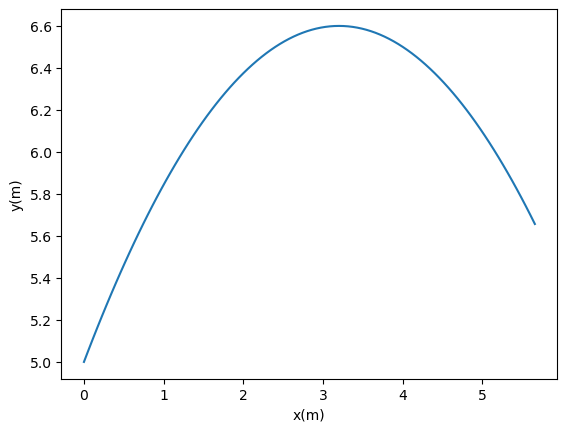

In [5]:
#plot trajectory 
Nbr_points=100
time_line = np.linspace(0,1,Nbr_points)
num_x = numeric_x_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
num_y = numeric_y_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
plt.plot(num_x,num_y)
plt.xlabel("x(m)")
plt.ylabel("y(m)")

Text(0.5, 0.01, 't(s)')

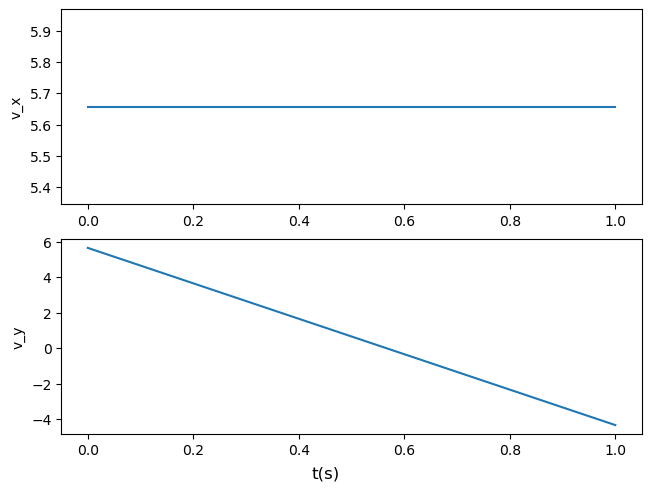

In [17]:
num_vx = numeric_vx_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
num_vy = numeric_vy_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)

fig, ax = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
ax[0].plot(time_line, [num_vx]*Nbr_points)
ax[0].set_ylabel("v_x")
ax[1].plot(time_line,num_vy)
ax[1].set_ylabel("v_y")

# common axis labels
fig.supxlabel("t(s)")